<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

m = 10 # num of samples
a = 2
b = 3
std = 2

np.random.seed(1025)
x = np.linspace(-5,5,m)
y_hat = a*x + b
n = np.zeros_like(y_hat)

In [69]:
y_hat

array([-7.        , -4.77777778, -2.55555556, -0.33333333,  1.88888889,
        4.11111111,  6.33333333,  8.55555556, 10.77777778, 13.        ])

In [70]:
n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
for i in range(m):
  n[i] = np.random.normal(0, std)
n

array([ 3.24769378,  2.87594092, -0.68878105, -4.17107052,  1.55951033,
       -2.59041868, -0.54752181, -1.14674617,  0.99679787,  0.97760185])

In [72]:
y = y_hat + n
y

array([-3.75230622, -1.90183686, -3.2443366 , -4.50440385,  3.44839921,
        1.52069243,  5.78581152,  7.40880939, 11.77457565, 13.97760185])

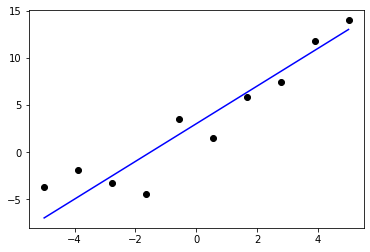

In [73]:
plt.plot(x, y_hat, c='b')
plt.scatter(x, y, c='k')
plt.show()